<a href="https://colab.research.google.com/github/DeborshiLahiri/DeborshiLahiri/blob/main/HackACode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from google.colab import files
import io
from tensorflow.keras import layers
from matplotlib import pyplot as plt
u = files.upload()
a= pd.read_csv(io.BytesIO(u['training_data.csv']))
b= pd.read_csv(io.BytesIO(u['testing_data.csv']))

Saving training_data.csv to training_data (1).csv
Saving testing_data.csv to testing_data (1).csv


In [ ]:
a = a.reindex(np.random.permutation(a.index))
b= b.reindex(np.random.permutation(b.index))
def change(x):
        if x=='High': return 1
        if x=='Medium':   return 0.5
        if x=='Low':   return 0
a['Level'] = a['Level'].apply(change)
a['Level'] = pd.to_numeric(a['Level'])
def changes(x):
        if x=='High': return 1
        if x=='Medium':   return 0.5
        if x=='Low':   return 0
b['Level'] = b['Level'].apply(changes)
b['Level'] = pd.to_numeric(b['Level'])

In [ ]:
#a['Obesity'] = a['Obesity'].astype('float')
#a['Coughing of Blood'] = a['Coughing of Blood'].astype('float')

In [ ]:
a.dtypes

Patient Id                   object
Age                           int64
Gender                        int64
Air Pollution                 int64
Alcohol use                   int64
Dust Allergy                  int64
OccuPational Hazards          int64
Genetic Risk                  int64
chronic Lung Disease          int64
Balanced Diet                 int64
Obesity                       int64
Smoking                       int64
Passive Smoker                int64
Chest Pain                    int64
Coughing of Blood             int64
Fatigue                       int64
Weight Loss                   int64
Shortness of Breath           int64
Wheezing                      int64
Swallowing Difficulty         int64
Clubbing of Finger Nails      int64
Frequent Cold                 int64
Dry Cough                     int64
Snoring                       int64
Level                       float64
dtype: object

In [ ]:
def build_model(my_learning_rate):
   model = tf.keras.models.Sequential()
   model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))
   model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
   return model               


def train_model(model, df, feature, label, my_epochs, 
                my_batch_size):
    history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=my_batch_size,
                      epochs=my_epochs)
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    rmse = hist["root_mean_squared_error"]
    return trained_weight, trained_bias, epochs, rmse, hist  
print("Defined the build_model and train_model functions.")

Defined the build_model and train_model functions.


In [ ]:
from matplotlib import pyplot as plt
def plot_the_model(trained_weight, trained_bias, feature, label):
  plt.xlabel(feature)
  plt.ylabel(label)
  random_examples = a.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])
  x0 = 0
  y0 = trained_bias
  x1 = 10000
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')
  plt.show()
def plot_the_loss_curve(epochs, rmse):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")
  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
6/6 [==============================] - 0s 2ms/step - loss: 0.2486 - root_mean_squared_error: 0.4986
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 0.1102 - root_mean_squared_error: 0.3320
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 0.0674 - root_mean_squared_error: 0.2597
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 0.0653 - root_mean_squared_error: 0.2555
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0642 - root_mean_squared_error: 0.2533
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 0.0630 - root_mean_squared_error: 0.2510
Epoch 8/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0617 - root_mean_squared_error: 0.2483
Epoch 9/100
6/6 [==============================] - 0s 3ms/step - loss: 0.0601 - root_mean_squared_error:

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


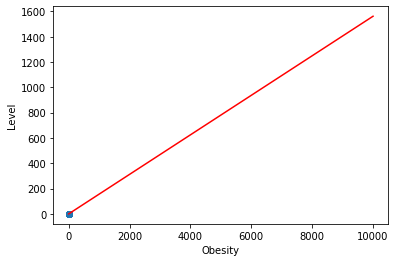

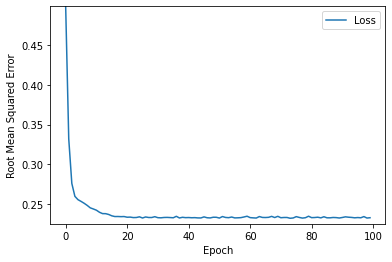

Defined the plot_curve function.


In [ ]:
learning_rate = 0.005
epochs = 100
batch_size = 150
my_feature= "Obesity"
e = a.reindex(np.random.permutation(a.index))  
my_label="Level" 
my_model = None
my_model = build_model(learning_rate)
weight, bias, epochs, rmse, hist = train_model(my_model, e, 
                                         my_feature, my_label,
                                         epochs, batch_size)
print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )
plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

print("Defined the plot_curve function.")

In [ ]:
def predict(n, feature, label):
  batch = b[feature][0:0 +n]
  predicted_values = my_model.predict_on_batch(x=batch)
  print("Patient Id     Level")
  print("--------------------------------------")
  for i in range(n):
    if(predicted_values[i][0]>=0 and predicted_values[i][0]<=0.3):
      print (b.at[i,"Patient Id"], "           ","Low" )  
    if(predicted_values[i][0]>=0.4 and predicted_values[i][0]<=0.6):
      print (b.at[i,"Patient Id"], "           ","Medium" )  
    if(predicted_values[i][0]>=0.7 and predicted_values[i][0]<=1):
      print (b.at[i,"Patient Id"], "           ","High" )  

In [ ]:
predict(201, my_feature, my_label)

Patient Id     Level
--------------------------------------
P818             High
P82             Medium
P820             Low
P822             High
P823             Medium
P824             Low
P825             Medium
P826             High
P827             Low
P828             Low
P829             Low
P83             Low
P830             Low
P831             High
P832             High
P833             Low
P834             High
P835             High
P836             Medium
P837             Medium
P838             Low
P839             Medium
P84             Medium
P840             High
P841             Low
P842             High
P843             High
P844             Medium
P845             Low
P846             Low
P847             High
P848             High
P849             High
P85             Low
P850             Low
P851             Low
P853             High
P854             High
P855             Low
P856             Low
P857             High
P858             High
P859             Medi